# import important libraries for project

In [23]:
%pip install django

     ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.0 MB 1.3 MB/s eta 0:00:07
     ---------------------------------------- 0.1/8.0 MB 656.4 kB/s eta 0:00:13
     ---------------------------------------- 0.1/8.0 MB 581.0 kB/s eta 0:00:14
      --------------------------------------- 0.1/8.0 MB 544.7 kB/s eta 0:00:15
      --------------------------------------- 0.1/8.0 MB 554.9 kB/s eta 0:00:15
      --------------------------------------- 0.2/8.0 MB 538.9 kB/s eta 0:00:15
      --------------------------------------- 0.2/8.0 MB 562.0 kB/s eta 0:00:14
     - -------------------------------------- 0.2/8.0 MB 573.4 kB/s eta 0:00:14
     - -------------------------------------- 0.3/8.0 MB 582.4 kB/s eta 0:00:14
     - -------------------------------------- 0.3/8.0 MB 587.7 kB/s eta 0:00:14
     - -------------------------------------- 0.3/8.0 MB 575.5 kB/s eta 0:00:14
     - -------------------------------------- 0.3/8

In [18]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk as nlp
import string
import re
from collections import Counter
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence

import warnings
warnings.filterwarnings('ignore')

os.chdir("E:\subjects cs 4\Graduation Project\GP")

ModuleNotFoundError: No module named 'sklearn'

# READ THE DATASET

In [ ]:
data = pd.read_csv(r"C:\Users\LeNOvO\NLP-Hate-Speech-Detection-master\train.hate_speech.csv")
df=data.copy()
df.drop(columns=['id'],axis=1,inplace=True)
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# Check class distribution in dependent variable 


,label
0,29720
1,2242


0s : 1s  ::   13.26 : 1


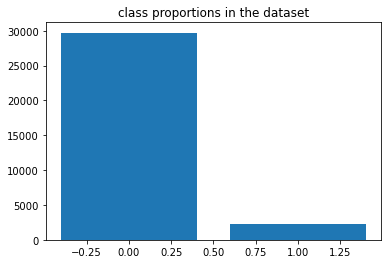

In [ ]:
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

## we see that we have an unbalanced data mojority class to minority class ratio of 13 : 1

,label
0,29720
1,6726


0s : 1s  ::   4.42 : 1


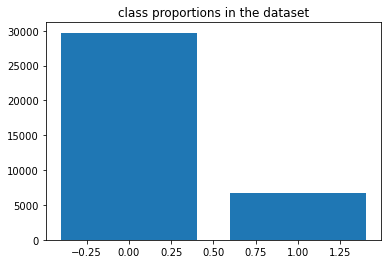

In [ ]:
#Balancing the dataset using Oversampling
data1=data[data['label']==1]
data0=data[data['label']==0]
data=pd.concat([data,data1,data1], axis=0)
data

#Check class distribution in dependent variable again
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

# DATA PREPROCESSING

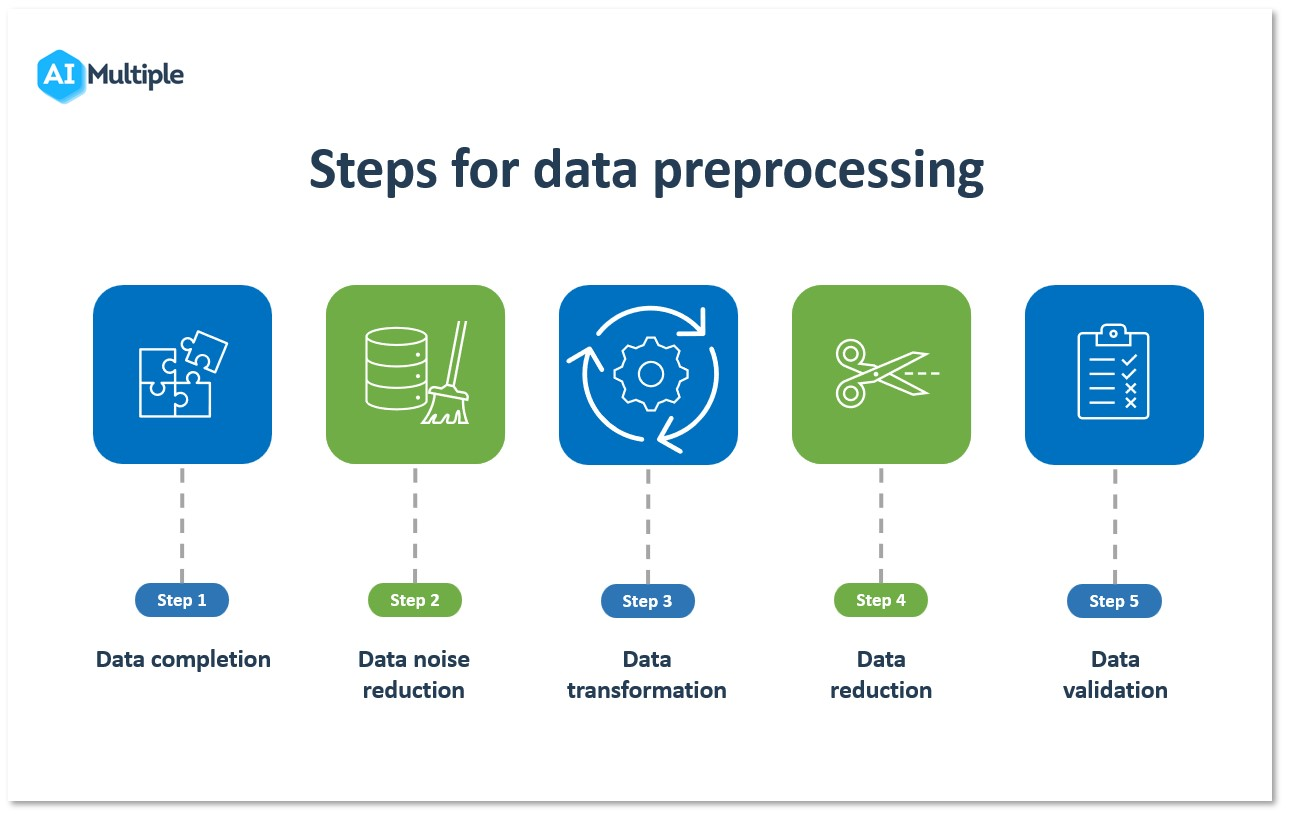

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)


def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

# preprocess train dataset


In [ ]:
#preprocess train dataset
data['tweet'] = data['tweet'].apply(remove_emoji)
data['tweet'] = data['tweet'].apply(clean_text)
data['Num_words_text'] = data['tweet'].apply(lambda x:len(str(x).split())) 

train_data,test_data= train_test_split(data, test_size=0.2)
train_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)
print(data['tweet'])

0        user when father dysfunctional selfish drags k...
1        user user thanks lyft credit cant cause they d...
2                                      bihday your majesty
3        model love take with time urð± ðððð...
4                            factsguide society motivation
                               ...                        
31934    lady banned from kentucky mall user jcpenny ke...
31946    user omfg offended mailbox proud mailboxpride ...
31947    user user dont have balls hashtag weasel away ...
31948              makes yourself then anybody until thank
31960         user sikh temple vandalised calgary condemns
Name: tweet, Length: 36446, dtype: object


# classes proportion in dependent variable in train and test dataset


In [ ]:
#classes proportion in dependent variable in train and test dataset
print('===========Train Data =========')
print(train_data['label'].value_counts())
print(len(train_data))
print('==============================')

print('===========Test Data =========')
print(test_data['label'].value_counts())
print(len(test_data))
print('==============================')

===========Train Data =========
0    23805
1     5351
Name: label, dtype: int64
29156
===========Test Data =========
0    5915
1    1375
Name: label, dtype: int64
7290


# train and validation dataset splitting


In [ ]:
#train and validation dataset splitting
X_train, X_valid, y_train, y_valid = train_test_split(train_data['tweet'].tolist(),\
                                                      train_data['label'].tolist(),\
                                                      test_size=0.2,\
                                                      stratify = train_data['label'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:23324
Class distributionCounter({0: 19043, 1: 4281})
Valid data len:5832
Class distributionCounter({0: 4762, 1: 1070})


# STEPS OF HANDLING DATA BEFORE MODEL WORKING

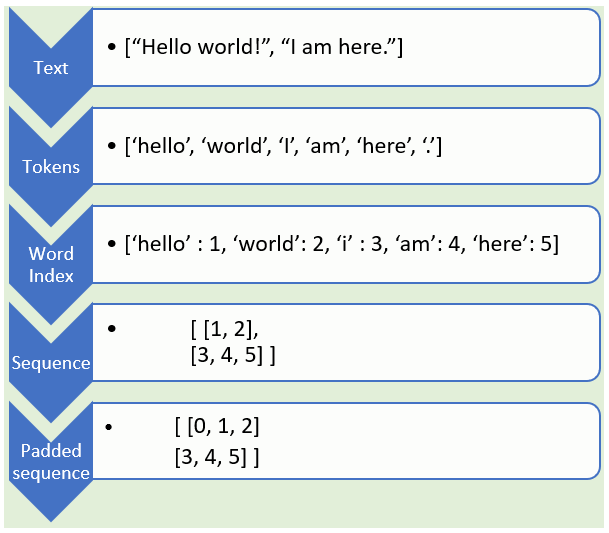

# FIRST STEP : TOKENIZATION

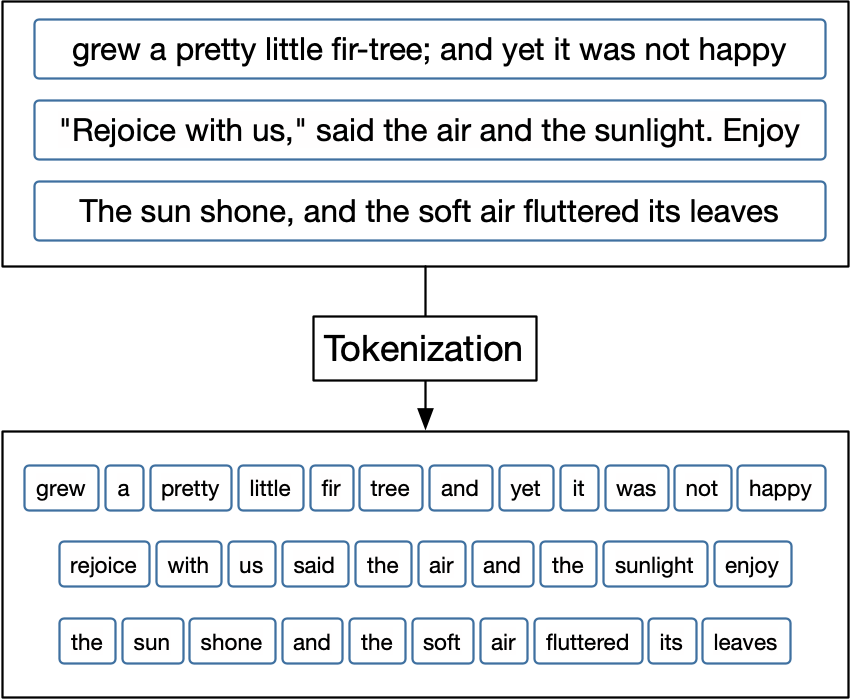

In [ ]:
num_words = 50000

#
#tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
#tokenizer.fit_on_texts(X_train)
df=data['tweet'].values.tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df)
#print(tokenizer.word_index)


# SECOND STEP : Convert sentences to sequences of numbers

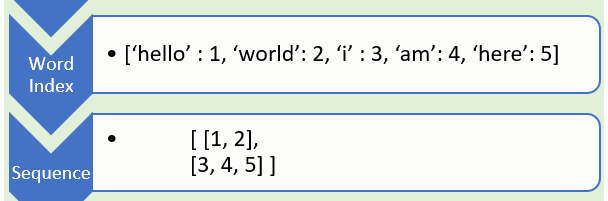

In [ ]:
#convert sentences to sequences of numbers
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['tweet'].tolist()) )


# THIRD STEP : padding to sequence

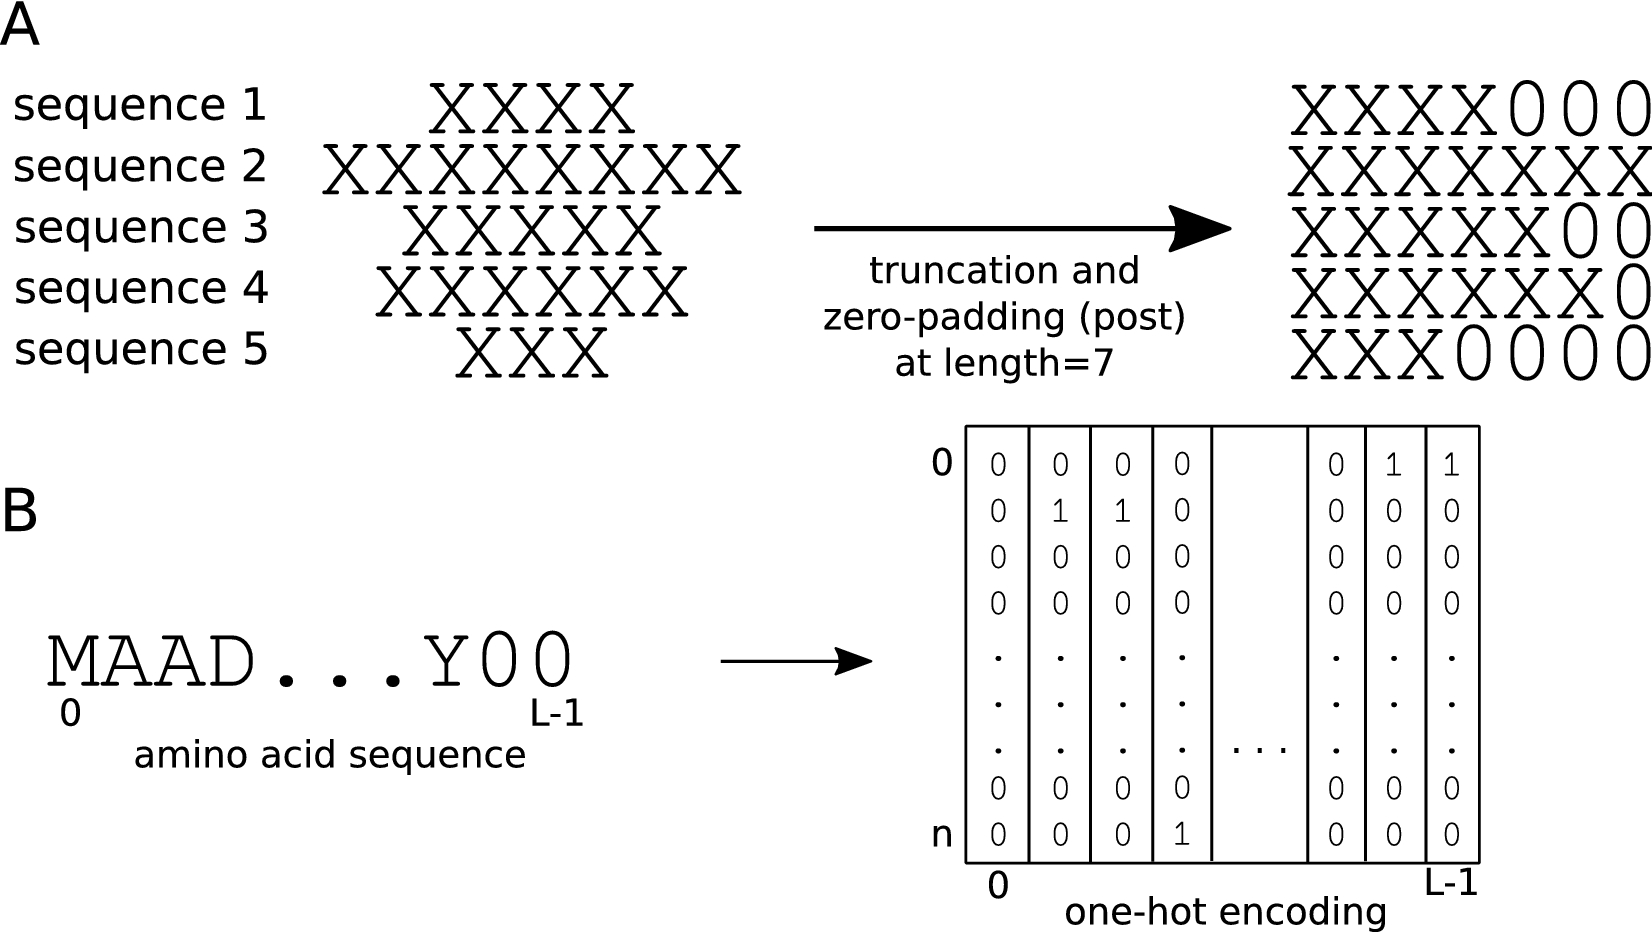

In [ ]:
#padding 
maxlen=50
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_valid = pad_sequences(x_valid, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)


train_labels = np.asarray(y_train)
valid_labels = np.asarray(y_valid)
test_labels = np.asarray(test_data['label'].tolist())


print('Train data len:'+str(len(x_train)))
print('Class distribution'+str(Counter(train_labels)))

print('Validation data len:'+str(len(x_valid)))
print('Class distribution'+str(Counter(valid_labels)))

print('Test data len:'+str(len(x_test)))
print('Class distribution'+str(Counter(test_labels)))

#tensorflow dataset preparation
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:23324
Class distributionCounter({0: 19043, 1: 4281})
Validation data len:5832
Class distributionCounter({0: 4762, 1: 1070})
Test data len:7290
Class distributionCounter({0: 5915, 1: 1375})


# showing dataset after (train,validation and test)

In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break

======Train dataset ====
tf.Tensor(
[21415  9130  5437   232 21416    11   892     1   940     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int32)
======Validation dataset ====
tf.Tensor(
[ 3880  5432     3  6410  9109 12710   454  7195  2797  1267     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int32)
======Test dataset ====
tf.Tensor(
[ 3041 13421  3041   311  1243   468  1768 13422  1160    56 13423     0
     0     0     0     0     0     0     0     0     0     0     0     0
    

# **PREPERATION OF DEEP LEARNING MODEL **

# RECCURENT NEURAL NETWORK (RNN)

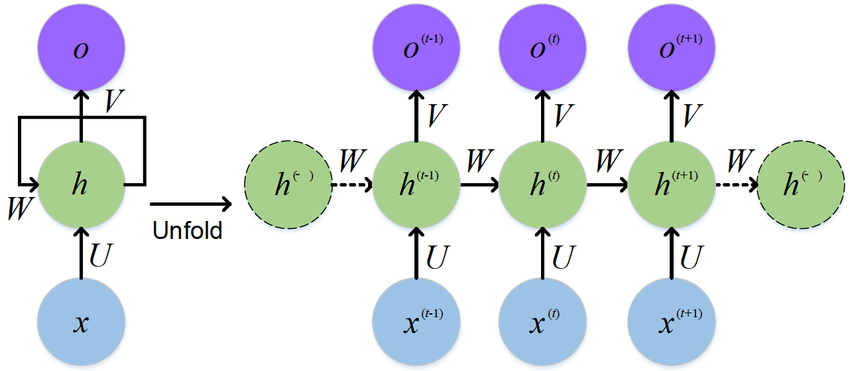

# LSTM MODEL

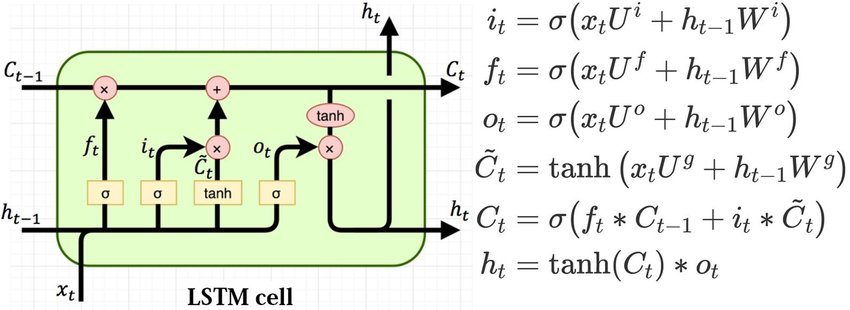

# FLATTEN

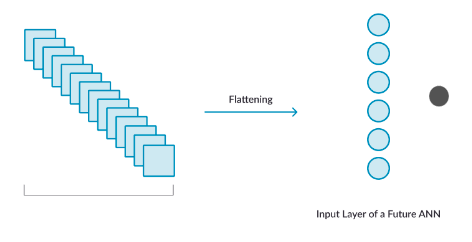

# EPOCHES AND BATCHES

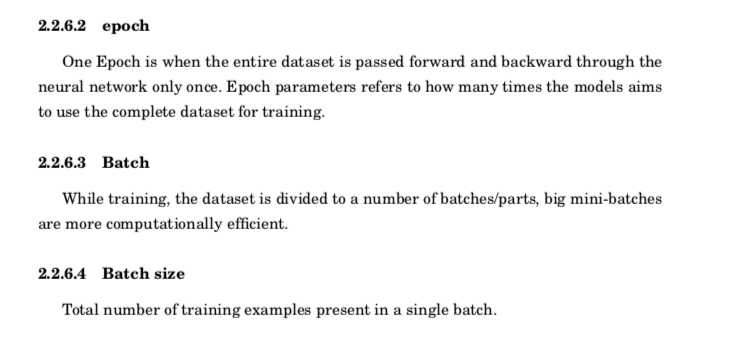

In [ ]:
#model preparation
max_features =50000
embedding_dim =16
sequence_length = maxlen

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               



model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            800016    
                                                                 
 dropout_3 (Dropout)         (None, 50, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 16)            2112      
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               410112    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                

In [ ]:
epochs = 10
# Fit the model using the train and test datasets.
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/10
23/23 [==============================] - 8s 161ms/step - loss: 2.9703 - binary_accuracy: 0.7964 - val_loss: 1.5623 - val_binary_accuracy: 0.8165
Epoch 2/10
23/23 [==============================] - 3s 132ms/step - loss: 1.1271 - binary_accuracy: 0.8164 - val_loss: 0.7840 - val_binary_accuracy: 0.8165
Epoch 3/10
23/23 [==============================] - 3s 138ms/step - loss: 0.7316 - binary_accuracy: 0.8165 - val_loss: 0.6167 - val_binary_accuracy: 0.8165
Epoch 4/10
23/23 [==============================] - 3s 133ms/step - loss: 0.6032 - binary_accuracy: 0.8278 - val_loss: 0.4915 - val_binary_accuracy: 0.8753
Epoch 5/10
23/23 [==============================] - 3s 134ms/step - loss: 0.4895 - binary_accuracy: 0.8970 - val_loss: 0.3954 - val_binary_accuracy: 0.9251
Epoch 6/10
23/23 [==============================] - 3s 138ms/step - loss: 0.3963 - binary_accuracy: 0.9386 - val_loss: 0.3219 - val_binary_accuracy: 0.9489
Epoch 7/10
23/23 [==============================] - 3s 133ms/ste

# make predictions on validation dataset

In [ ]:
#make predictions on validation dataset
valid_predict= model.predict(x_valid)
print(valid_predict[:10])

183/183 [==============================] - 1s 5ms/step
[[3.2402473e-04]
 [6.9703811e-01]
 [9.9501663e-01]
 [1.1358387e-05]
 [4.8303526e-05]
 [9.9484807e-01]
 [1.4036763e-04]
 [4.3916029e-01]
 [9.4776333e-06]
 [9.7113013e-01]]


# model's metrics on test dataset


In [ ]:
#model's metrics on test dataset
x_test  = np.array( tokenizer.texts_to_sequences(test_data['tweet'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)


#Generate predictions for all samples
predictions = model.predict(x_test)

228/228 [==============================] - 1s 5ms/step


# plot predictions


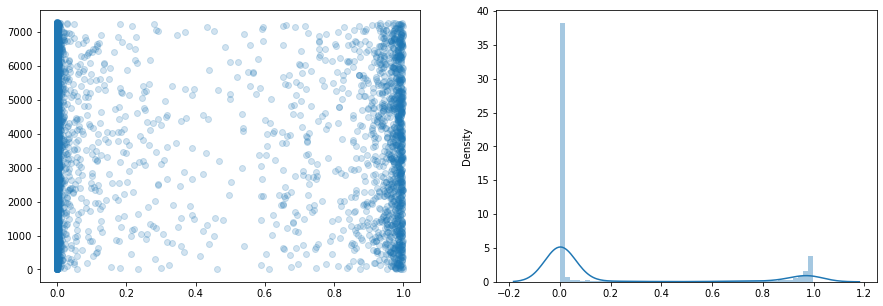

In [ ]:
#plot predictions
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,range(0,len(predictions)),alpha=0.2)
ax2=sns.distplot(predictions)

In [ ]:
cutoff=0.86
test_data['pred_sentiment']= predictions
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= cutoff),1,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < cutoff),0,test_data.pred_sentiment)

labels = [0, 1]
print(classification_report(test_data['label'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5915
           1       0.96      0.79      0.87      1375

    accuracy                           0.95      7290
   macro avg       0.96      0.89      0.92      7290
weighted avg       0.95      0.95      0.95      7290



## TESTING MODEL ON THE TEST DATASET PROVIDED

In [ ]:
final_test=pd.read_csv("test.csv")

ftest=final_test.copy()
ftest.drop(columns=['id'],axis=1,inplace=True)

ftest['tweet'] = ftest['tweet'].apply(remove_emoji)
ftest['tweet'] = ftest['tweet'].apply(clean_text)

f_test  = np.array( tokenizer.texts_to_sequences(ftest['tweet'].tolist()) )
f_test = pad_sequences(f_test, padding='post', maxlen=maxlen)

display((x_test))
display((f_test))

array([[ 3041, 13421,  3041, ...,     0,     0,     0],
       [  152,  1607,  5339, ...,     0,     0,     0],
       [  399,  7474, 40710, ...,     0,     0,     0],
       ...,
       [    1,     1,   975, ...,     0,     0,     0],
       [   51,    12,   108, ...,     0,     0,     0],
       [  480,   494,   267, ...,     0,     0,     0]])

array([[14712,  6399,  1501, ...,     0,     0,     0],
       [    1,    59, 11428, ...,     0,     0,     0],
       [  526,   779,   722, ...,     0,     0,     0],
       ...,
       [    8,    33,   334, ...,     0,     0,     0],
       [  348,   734,   124, ...,     0,     0,     0],
       [  260,   887,  7391, ...,     0,     0,     0]])

# predict on actual test data


In [ ]:
#predict on actual test data
predictions = model.predict(f_test)

538/538 [==============================] - 3s 5ms/step


# plot predictions


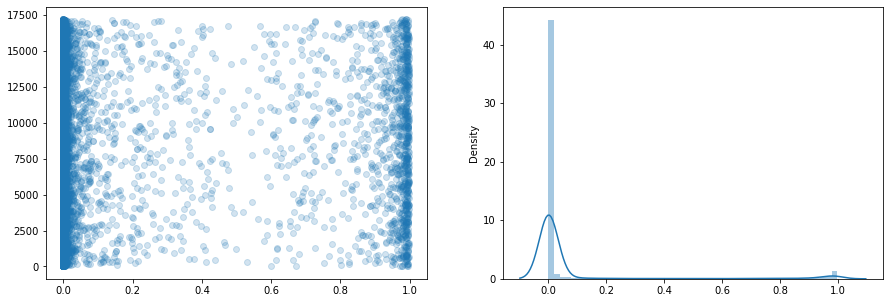

In [ ]:
#plot predictions
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,ftest.index,alpha=0.2)
ax2=sns.distplot(predictions)

# mapping predictions

In [ ]:
#mapping prediction to 1 or 0
ftest['pred_sentiment']= predictions
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment >= cutoff),1,ftest.pred_sentiment)
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment < cutoff),0,ftest.pred_sentiment)

#processed tweets categorized as hate speech
pd.set_option('display.max_colwidth', None)
ftest[ftest['pred_sentiment']==1]

,tweet,pred_sentiment
1,user white supremacists want everyone birdsâ movie hereâs,1.0
19,thought factory neutrality right wing fascism politics media brexit trump leadership,1.0
26,chick gets fucked hottest naked lady,1.0
33,suppo taiji fisherman bullying racism tweet4taiji thecove seashepherd,1.0
42,user user trumps invested billions into saudi empowers people funding isis trumpsahypocrite,1.0
...,...,...
17148,grew fucked upð¤ fucked upð¥ believing better place fucking upð© âï¸,1.0
17176,user user most racist ever,1.0
17188,black professor demonizes proposes nazi style confiscation white assets like 1930s germany breaking,1.0
17192,thought factory leftright polarisation trump uselections2016 leadership politics brexit,1.0


In [ ]:
#actual tweets categorized as hate speech
final_test.iloc[ftest[ftest['pred_sentiment']==1.index]

SyntaxError: invalid syntax (2117944509.py, line 2)